# Importing libraries

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt


# load data

In [59]:
data=pd.read_csv('student_scores.csv')
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [31]:
data.size

50

In [32]:
x=data.drop('Scores',axis='columns')
y=data['Scores']

# visualization
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

Text(0, 0.5, 'Percentage Score')

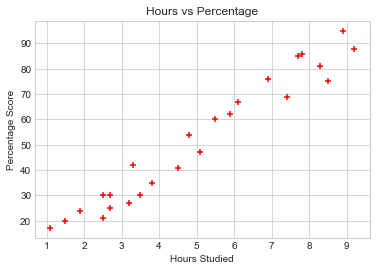

In [38]:
plt.style.use('seaborn-whitegrid')
plt.scatter(x,y,marker='+',color='red')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

#  train_test_split
Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [39]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

# Training algorithm

In [40]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

# training model

In [60]:
model.fit(X_train,y_train)
print("Training complete.")

Training complete.


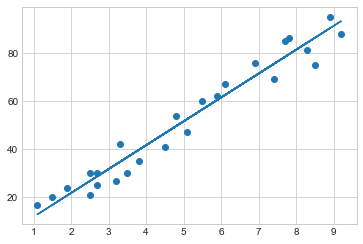

In [45]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Testing model for some values

In [49]:
print(X_test)
y_pred=model.predict(X_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [50]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [52]:
# You can also test with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# The final step is to evaluate the performance of algorithm.

In [61]:
score=model.score(X_test,y_test)
error=100-score*100
print("Accuracy level = {}".format(score*100))
print("error = {}".format(error))

Accuracy level = 94.54906892105356
error = 5.450931078946439
